# Minimos Quadrados

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

def least_squares_classification(X, y, alpha):
    # Adiciona uma coluna de 1s para representar o termo de viés
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # Calcula os coeficientes usando a fórmula dos mínimos quadrados com regularização de Ridge
    theta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y

    return theta

def calculate_error(X, y, theta):
    # Adiciona uma coluna de 1s para representar o termo de viés
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # Realiza as predições
    predictions = X @ theta

    # Converte as predições em rótulos
    predicted_labels = np.argmax(predictions, axis=1)

    # Calcula o erro (taxa de erro)
    error = np.mean(predicted_labels != y)

    return error

# Carrega o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normaliza os dados dividindo por 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

# Converte os rótulos para uma representação one-hot
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]

# Define o valor de regularização (alpha)
alpha = 0.01

# Realiza a classificação usando mínimos quadrados com regularização de Ridge
theta = least_squares_classification(X_train, y_train_onehot, alpha)

# Adiciona uma coluna de 1s aos dados de teste
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Realiza as predições
predictions = X_test @ theta

# Converte as predições em rótulos
predicted_labels = np.argmax(predictions, axis=1)

# # Calcula a acurácia
# accuracy = np.mean(predicted_labels == y_test) * 100
# print("Acurácia da classificação: {:.2f}%".format(accuracy))

# Calcular a precisão das previsões
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.8603


# Perceptron Logístico

## Using Sklearn

In [59]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Carrega o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normaliza os dados dividindo por 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

# Cria uma instância do perceptron logístico
model = Perceptron()

# Treina o modelo
model.fit(X_train, y_train)

# Realiza as predições no conjunto de teste
y_pred = model.predict(X_test)

# Calcula a acurácia
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia da classificação: {:.2f}%".format(accuracy * 100))

Acurácia da classificação: 88.05%


## A mão

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist


In [8]:
class LogisticPerceptron:
    def __init__(self, num_features, num_classes, learning_rate=0.01, num_epochs=100):
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = np.zeros((num_features + 1, num_classes))  # +1 for the bias term

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, x):
        activations = np.dot(np.insert(x, 0, 1), self.weights)
        probabilities = self.sigmoid(activations)
        return np.argmax(probabilities)

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Inserting bias term
        y = np.eye(self.num_classes)[y]  # One-hot encoding
        for _ in range(self.num_epochs):
            for i in range(len(X)):
                x = X[i]
                target = y[i]
                activations = np.dot(x, self.weights)
                probabilities = self.sigmoid(activations)
                error = target - probabilities
                delta = self.learning_rate * np.outer(x, error)
                self.weights += delta



In [17]:
# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
# Normalizar os dados
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
# Criar o objeto do perceptron logístico
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
perceptron = LogisticPerceptron(num_features=num_features, num_classes=num_classes)

In [29]:
# Treinar o perceptron
perceptron.train(X_train, y_train)

In [30]:
# Realizar previsões no conjunto de teste
predictions = []
for sample in X_test:
    prediction = perceptron.predict(sample)
    predictions.append(prediction)

In [31]:
# Calcular a precisão das previsões
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9099


# Minimos Quadrados + PCA

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

def least_squares_classification(X, y, alpha):
    # Adiciona uma coluna de 1s para representar o termo de viés
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # Calcula os coeficientes usando a fórmula dos mínimos quadrados com regularização de Ridge
    theta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y

    return theta

# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalizar os dados
X_train = X_train / 255.0
X_test = X_test / 255.0

# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #
# Calcular a matriz de covariância
cov_matrix = np.cov(X_train.T)

# Calcular os autovetores e autovalores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar os autovetores em ordem decrescente dos autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Escolher o número de componentes principais
num_components = 100

# Selecionar as componentes principais
principal_components = sorted_eigenvectors[:, :num_components]

# Projetar os dados nas componentes principais
X_train_pca = np.dot(X_train, principal_components)

# Projetar os dados nas componentes principais
X_test_pca = np.dot(X_test, principal_components)

# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #

# Converte os rótulos para uma representação one-hot
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]

# Define o valor de regularização (alpha)
alpha = 0.01

# Realiza a classificação usando mínimos quadrados com regularização de Ridge
theta = least_squares_classification(X_train_pca, y_train_onehot, alpha)

# Adiciona uma coluna de 1s aos dados de teste
X_test = np.concatenate((np.ones((X_test_pca.shape[0], 1)), X_test_pca), axis=1)

# Realiza as predições
predictions = X_test @ theta

# Converte as predições em rótulos
predicted_labels = np.argmax(predictions, axis=1)

# # Calcula a acurácia
# accuracy = np.mean(predicted_labels == y_test) * 100
# print("Acurácia da classificação: {:.2f}%".format(accuracy))

# Calcular a precisão das previsões
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8611


In [40]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

def least_squares_classification(X, y, alpha):
    # Adiciona uma coluna de 1s para representar o termo de viés
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # Calcula os coeficientes usando a fórmula dos mínimos quadrados com regularização de Ridge
    theta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y

    return theta

# Carrega o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normaliza os dados dividindo por 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #
# Calcular a matriz de covariância
cov_matrix = np.cov(X_train.T)

# Calcular os autovetores e autovalores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar os autovetores em ordem decrescente dos autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Escolher o número de componentes principais
num_components = 155

# Selecionar as componentes principais
principal_components = sorted_eigenvectors[:, :num_components]

# Projetar os dados de treino nas componentes principais
X_train_pca = np.dot(X_train, principal_components)

# Projetar os dados de teste nas componentes principais
X_test_pca = np.dot(y_test, principal_components)
# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #

# Converte os rótulos para uma representação one-hot
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]

# Define o valor de regularização (alpha)
alpha = 0.01

# Realiza a classificação usando mínimos quadrados com regularização de Ridge
theta = least_squares_classification(X_train_pca, y_train_onehot, alpha)

# Adiciona uma coluna de 1s aos dados de teste
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test_pca), axis=1)

# Realiza as predições
predictions = X_test @ theta

# Converte as predições em rótulos
predicted_labels = np.argmax(predictions, axis=1)

# # Calcula a acurácia
# accuracy = np.mean(predicted_labels == y_test) * 100
# print("Acurácia da classificação: {:.2f}%".format(accuracy))

# Calcular a precisão das previsões
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

ValueError: shapes (10000,) and (784,155) not aligned: 10000 (dim 0) != 784 (dim 0)

# Perceptron Logistico + PCA

In [39]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

class LogisticPerceptron:
    def __init__(self, num_features, num_classes, learning_rate=0.01, num_epochs=100):
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = np.zeros((num_features + 1, num_classes))  # +1 for the bias term

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, x):
        activations = np.dot(np.insert(x, 0, 1), self.weights)
        probabilities = self.sigmoid(activations)
        return np.argmax(probabilities)

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Inserting bias term
        y = np.eye(self.num_classes)[y]  # One-hot encoding
        for _ in range(self.num_epochs):
            for i in range(len(X)):
                x = X[i]
                target = y[i]
                activations = np.dot(x, self.weights)
                probabilities = self.sigmoid(activations)
                error = target - probabilities
                delta = self.learning_rate * np.outer(x, error)
                self.weights += delta


# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ajusta a forma dos dados
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalizar os dados
X_train = X_train / 255.0
X_test = X_test / 255.0

# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #
# Calcular a matriz de covariância
cov_matrix = np.cov(X_train.T)

# Calcular os autovetores e autovalores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar os autovetores em ordem decrescente dos autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Escolher o número de componentes principais
num_components = 155

# Selecionar as componentes principais
principal_components = sorted_eigenvectors[:, :num_components]

# Projetar os dados nas componentes principais
X_train_pca = np.dot(X_train, principal_components)

# Projetar os dados nas componentes principais
X_test_pca = np.dot(X_test, principal_components)


# -------------------------- PCA -------------------------- #
# --------------------------------------------------------- #

# Criar o objeto do perceptron logístico
num_features = X_train_pca.shape[1]
num_classes = len(np.unique(y_train))
perceptron = LogisticPerceptron(num_features=num_features, num_classes=num_classes)

# Treinar o perceptron
perceptron.train(X_train_pca, y_train)

# Realizar previsões no conjunto de teste
predictions = []
for sample in X_test_pca:
    prediction = perceptron.predict(sample)
    predictions.append(prediction)

# Calcular a precisão das previsões
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9058


# Multi Layer Perceptron

In [95]:
import numpy as np
import requests, gzip, os, hashlib
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%pylab inline

(X, Y), (X_test, y_test) = mnist.load_data()

#Validation split
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
y_train,y_val=Y[train_no],Y[val_no]

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("Y_vall: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

def init(x, y):
    layer = np.random.uniform(-1, 1., size=(x,y)) / np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1 = init(28*28, 128)
l2 = init(128, 10)

# sigmoid function
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

# derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x)) / ((np.exp(-x) + 1)**2)

# sofmax function
def softmax(x):
    exp_element = np.exp(x-x.max())
    return exp_element / np.sum(exp_element, axis=0)

# derivative of softmax
def d_softmax(x):
    exp_element = np.exp(x-x.max())
    return exp_element / np.sum(exp_element, axis=0) * (1-exp_element / np.sum(exp_element, axis=0))

# foward and backward pass
def forward_backward_pass(x, y):
    targets = np.zeros((len(y), 10), np.float32)
    targets[range(targets.shape[0]), y] = 1

    x_l1 = x.dot(l1)
    x_sigmoid = sigmoid(x_l1)

    x_l2 = x_sigmoid.dot(l2)
    out = softmax(x_l2)


    error = 2 * (out - targets) / out.shape[0] * d_softmax(x_l2)
    update_l2 = x_sigmoid.T @ error


    error = ((l2).dot(error.T)).T * d_sigmoid(x_l1)
    update_l1 = x.T @ error

    return out, update_l1, update_l2


epochs = 10000
lr = 0.001
batch = 128

accuracies, losses, val_accuracies, losses_val, test_accuracies, test_losses = [], [], [], [], [], []

for i in range(epochs):
    sample = np.random.randint(0, X_train.shape[0], size=(batch))
    x = X_train[sample].reshape((-1, 28*28))
    y = y_train[sample]

    out, update_l1, update_l2 = forward_backward_pass(x, y)

    category = np.argmax(out, axis=1)
    accuracy = (category == y).mean()
    accuracies.append(accuracy)

    loss = ((category - y)**2).mean()
    losses.append(loss.item())

    l1 = l1 - lr*update_l1
    l2 = l2 - lr*update_l2

    if(i%20 == 0):
        X_val = X_val.reshape((-1, 28*28))
        val_out = np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)), axis=1)
        val_acc = (val_out == y_val).mean()
        val_accuracies.append(val_acc.item())
        loss_val = ((val_out - y_val)**2).mean()
        losses_val.append(loss_val.item())
    if(i%500 == 0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
X_train:  (50000, 28, 28)
y_train:  (50000,)
X_val:  (10000, 28, 28)
Y_vall:  (10000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
For 0th epoch: train accuracy: 0.062 | validation accuracy:0.063
For 500th epoch: train accuracy: 0.680 | validation accuracy:0.662
For 1000th epoch: train accuracy: 0.742 | validation accuracy:0.749
For 1500th epoch: train accuracy: 0.766 | validation accuracy:0.774
For 2000th epoch: train accuracy: 0.812 | validation accuracy:0.785
For 2500th epoch: train accuracy: 0.789 | validation accuracy:0.794
For 3000th epoch: train accuracy: 0.805 | validation accuracy:0.801
For 3500th epoch: train accuracy: 0.789 | validation accuracy:0.807
For 4000th epoch: train accuracy: 0.766 | validation accuracy:0.812
For 4500th epoch: train accuracy: 0.836 | validation accuracy:0.815
For 5000th epoch: train accuracy: 0.859 | validatio

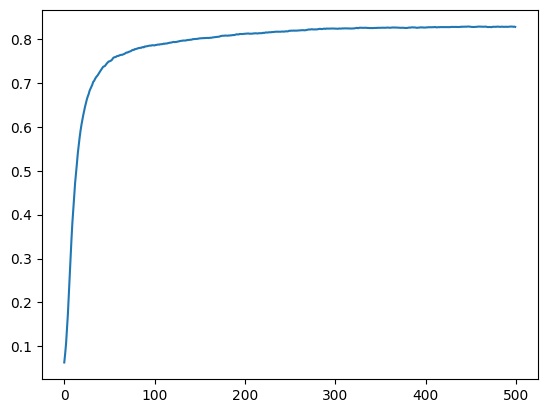

In [93]:
plot(val_accuracies)

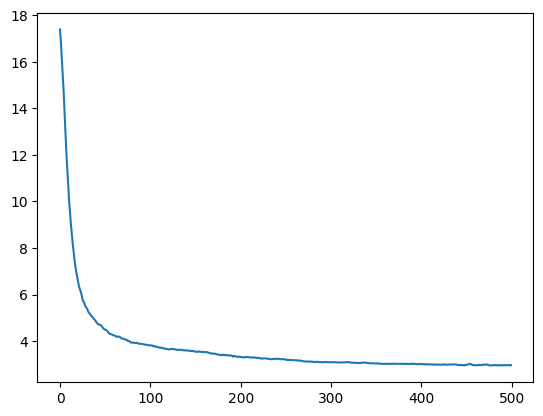

In [98]:
plot(losses_val)

In [94]:
X_test=X_test.reshape((-1,28*28))
test_out=np.argmax(softmax(sigmoid(X_test.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 83.79%


# Multi Layer Perceptron + PCA

In [ ]:
import numpy as np
import requests, gzip, os, hashlib
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%pylab inline

(X, Y), (X_test, y_test) = mnist.load_data()

#Validation split
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
y_train,y_val=Y[train_no],Y[val_no]

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("Y_vall: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

def init(x, y):
    layer = np.random.uniform(-1, 1., size=(x,y)) / np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1 = init(28*28, 128)
l2 = init(128, 10)

# sigmoid function
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

# derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x)) / ((np.exp(-x) + 1)**2)

# sofmax function
def softmax(x):
    exp_element = np.exp(x-x.max())
    return exp_element / np.sum(exp_element, axis=0)

# derivative of softmax
def d_softmax(x):
    exp_element = np.exp(x-x.max())
    return exp_element / np.sum(exp_element, axis=0) * (1-exp_element / np.sum(exp_element, axis=0))

# foward and backward pass
def forward_backward_pass(x, y):
    targets = np.zeros((len(y), 10), np.float32)
    targets[range(targets.shape[0]), y] = 1

    x_l1 = x.dot(l1)
    x_sigmoid = sigmoid(x_l1)

    x_l2 = x_sigmoid.dot(l2)
    out = softmax(x_l2)


    error = 2 * (out - targets) / out.shape[0] * d_softmax(x_l2)
    update_l2 = x_sigmoid.T @ error


    error = ((l2).dot(error.T)).T * d_sigmoid(x_l1)
    update_l1 = x.T @ error

    return out, update_l1, update_l2


epochs = 10000
lr = 0.001
batch = 128

accuracies, losses, val_accuracies, losses_val, test_accuracies, test_losses = [], [], [], [], [], []

for i in range(epochs):
    sample = np.random.randint(0, X_train.shape[0], size=(batch))
    x = X_train[sample].reshape((-1, 28*28))
    y = y_train[sample]

    out, update_l1, update_l2 = forward_backward_pass(x, y)

    category = np.argmax(out, axis=1)
    accuracy = (category == y).mean()
    accuracies.append(accuracy)

    loss = ((category - y)**2).mean()
    losses.append(loss.item())

    l1 = l1 - lr*update_l1
    l2 = l2 - lr*update_l2

    if(i%20 == 0):
        X_val = X_val.reshape((-1, 28*28))
        val_out = np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)), axis=1)
        val_acc = (val_out == y_val).mean()
        val_accuracies.append(val_acc.item())
        loss_val = ((val_out - y_val)**2).mean()
        losses_val.append(loss_val.item())
    if(i%500 == 0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

In [ ]:
X_test=X_test.reshape((-1,28*28))
test_out=np.argmax(softmax(sigmoid(X_test.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')